In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in cgs units
G = 6.67430e-8  # Gravitational constant (cm^3 g^-1 s^-2)
c = 2.99792458e10  # Speed of light in cm/s
Msun = 1.989e33  # Solar mass in g
Rsun = 6.957e10  # Solar radius in cm

# System parameters
M = 30 * Msun  # Primary mass
m = 25 * Msun  # Secondary mass
a_init = 10 * Rsun  # Initial semi-major axis
e_init = 0.9  # Initial eccentricity

# Functions for Peters' equations
def da_dt(a, e, M, m):
    """Rate of change of semi-major axis."""
    beta = 64 / 5 * G**3 * M * m * (M + m) / c**5
    return -beta * a**(-3) * (1 - e**2)**(-7/2) * (1 + (73/24) * e**2 + (37/96) * e**4)

def de_dt(a, e, M, m):
    """Rate of change of eccentricity."""
    beta = 304 / 15 * G**3 * M * m * (M + m) / c**5
    return -beta * a**(-4) * e * (1 - e**2)**(-5/2) * (1 + (121/304) * e**2)

In [4]:
# Time evolution parameters -> for eulers equation time steps must be small enough
## to prevent numerival instability
dt = 1e5  # Time step in seconds
t_max = 1e17  # Maximum time in seconds

# Initialize variables
a = a_init
e = e_init
t = 0

# Store results
times = [t]
a_values = [a]
e_values = [e]

# Euler integration
## x(t+h)=x(t)+ hf(x,t) -> here a(t+dt)=a + dt*f
while t < t_max and a > 0 and e > 0:
    da = da_dt(a, e, M, m) * dt
    de = de_dt(a, e, M, m) * dt
    a += da # same as a+da but stored as a afterwards 
    e += de
    t += dt
    if e < 0:  # Ensure eccentricity does not go below 0
        e = 0
    times.append(t)
    a_values.append(a)
    e_values.append(e)

# Convert time to Myrs for plotting
times = np.array(times) / (3.154e7 * 1e6)


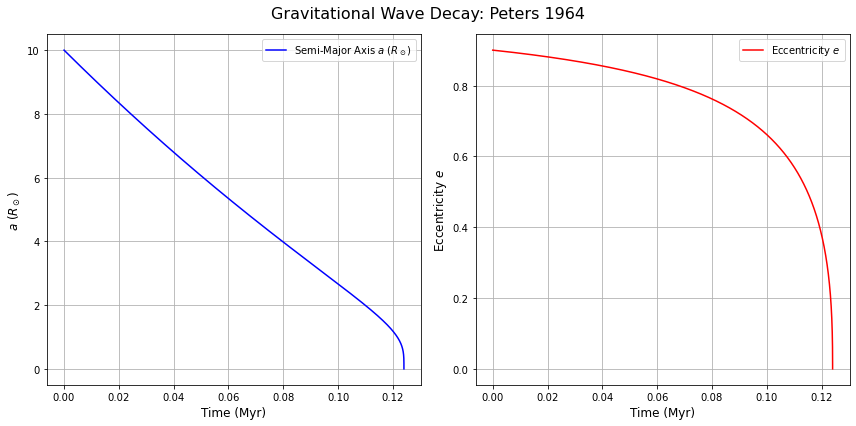

In [5]:
# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(times, np.array(a_values) / Rsun, label=r'Semi-Major Axis $a$ ($R_\odot$)', color='b')
plt.xlabel('Time (Myr)', fontsize=12)
plt.ylabel(r'$a$ ($R_\odot$)', fontsize=12)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, e_values, label='Eccentricity $e$', color='r')
plt.xlabel('Time (Myr)', fontsize=12)
plt.ylabel('Eccentricity $e$', fontsize=12)
plt.grid(True)
plt.legend()

plt.suptitle('Gravitational Wave Decay: Peters 1964', fontsize=16)
plt.tight_layout()
plt.show()